<a href="https://colab.research.google.com/github/GasparQC/Proyectos/blob/main/Presion_Arterial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PracticasProfesionalisantes1/talla-peso-edad.csv', sep = ';')
df.columns = [c.lower() for c in df.columns]
df.sample(5)

,altura,peso,sexo,edad,pa_max
3050,"1,5",60,M,71,"13,9"
4663,"1,66",103,M,35,"99,4"
3406,"1,58",67,M,36,"13,7"
4442,2,199,M,41,"13,3"
2301,"1,65",52,F,51,"10,7"


In [ ]:
df.dropna(axis = 0, inplace = True)
df.altura = df.altura.str.replace(',', '.').astype(float)
df.pa_max = df.pa_max.str.replace(',', '.').astype(float)

columnas = ['altura', 'peso', 'edad', 'pa_max']
df_desc = df.describe()
df_var = df[columnas].var().to_frame().T
df_var.index = ['var']

estadisticas = pd.concat([df_desc, df_var])
estadisticas

,altura,peso,edad,pa_max
count,4812.000000,4.812000e+03,4812.000000,4812.000000
mean,7.920064,1.065361e+03,47.854738,16.362053
std,31.922850,8.505207e+03,17.305738,13.505243
min,1.450000,0.000000e+00,18.000000,8.400000
25%,1.600000,6.400000e+01,33.000000,12.500000
50%,1.700000,8.000000e+01,48.000000,14.400000
75%,1.820000,1.040000e+02,63.000000,16.900000
max,226.000000,1.230000e+05,77.000000,193.000000
var,1019.068336,7.233855e+07,299.488560,182.391576


In [ ]:
df = df.drop(df.loc[df.altura > 2.5].index, axis = 0).reset_index(drop = True)
df = df.drop(df.loc[df.altura > 2.5].index, axis = 0).reset_index(drop = True)
df = df.drop(df.loc[(df.peso < 30) | (df.peso > 250)].index, axis = 0).reset_index(drop = True)
df.describe()

,altura,peso,edad,pa_max
count,4538.000000,4538.000000,4538.000000,4538.000000
mean,1.705584,88.088145,47.809608,16.292221
std,0.141810,33.901030,17.371725,13.276873
min,1.450000,36.000000,18.000000,8.400000
25%,1.600000,64.000000,33.000000,12.500000
50%,1.690000,80.000000,48.000000,14.400000
75%,1.800000,102.000000,63.000000,16.900000
max,2.350000,249.000000,77.000000,193.000000


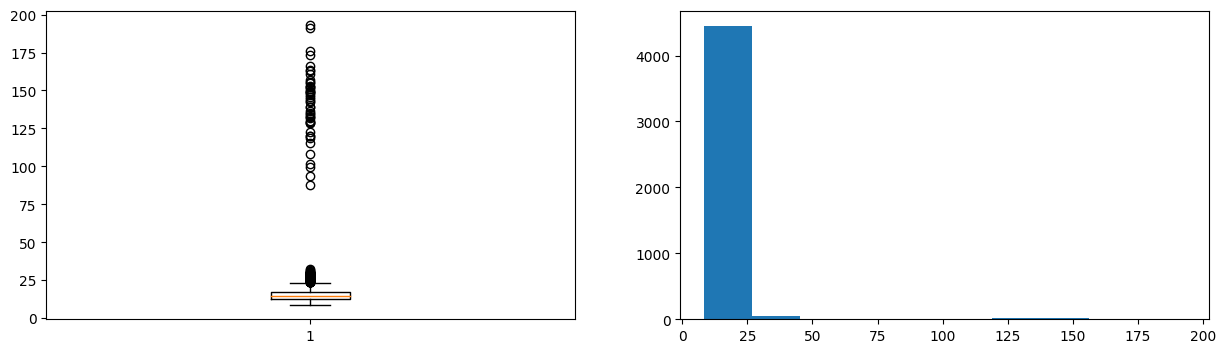

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
ax[0].boxplot(df.pa_max)
ax[1].hist(df.pa_max)

plt.show()


Notando la cantidad de valores atípicos decidí filtrar PA_max teniendo en cuenta que 80 mmhg es presión baja y 120 mmhg es presión alta

In [ ]:
df.pa_max = df.pa_max.astype(str).str.replace('.', '').astype(int)
mean_PA = df.pa_max.mean()
df.loc[df.pa_max > mean_PA]
df = df.drop(df.loc[df.pa_max > mean_PA].index, axis = 0).reset_index(drop = True)

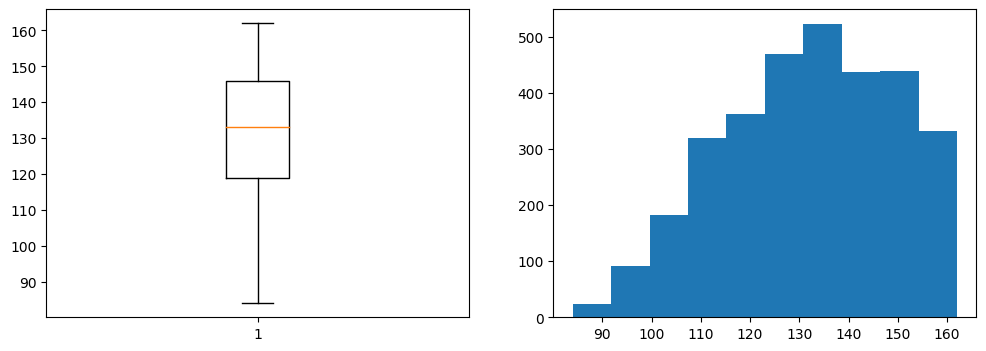

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
ax[0].boxplot(df.pa_max)
ax[1].hist(df.pa_max)

plt.show()

In [ ]:
df.describe()
bins = [18, 29, 39, 49, 59, 69, 79] # Límites para los rangos de edad
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79']  # Etiquetas para cada grupo
df['rango_etario'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)
df.edad = df.edad.astype(int)
df


,altura,peso,sexo,edad,pa_max,rango_etario
0,1.71,69,F,18,98,18-29
1,1.70,122,M,22,144,18-29
2,1.45,42,F,54,133,50-59
3,1.88,101,F,38,158,30-39
4,1.65,52,F,25,103,18-29
...,...,...,...,...,...,...
3176,1.85,109,F,27,116,18-29
3177,1.85,105,M,74,136,70-79
3178,1.78,66,F,31,99,30-39
3179,1.81,168,F,57,155,50-59


In [ ]:
# Crear una función para clasificar la presión arterial según el valor de PA_max
def clasificar_presion(pa_max):
    if pa_max < 90:
        return 'Baja'
    elif 90 <= pa_max <= 120:
        return 'Normal'
    else:
        return 'Alta'

# Aplicar la función para crear una nueva columna 'clasificacion_PA'
df['clasificacion_PA'] = df['pa_max'].apply(clasificar_presion)

# Verificar el resultado
print(df[['edad', 'pa_max', 'clasificacion_PA']].head())


   edad  pa_max clasificacion_PA
0    18      98           Normal
1    22     144             Alta
2    54     133             Alta
3    38     158             Alta
4    25     103           Normal


In [ ]:
# Contar cuántos individuos están en cada categoría de presión por rango etario
presion_por_rango = df.groupby(['rango_etario', 'clasificacion_PA']).size().unstack()
presion_por_rango
df.describe()

<ipython-input-11-03b946ecd6fa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  presion_por_rango = df.groupby(['rango_etario', 'clasificacion_PA']).size().unstack()


,altura,peso,edad,pa_max
count,3181.000000,3181.000000,3181.000000,3181.000000
mean,1.698513,85.360578,44.182647,131.944043
std,0.140331,32.989742,16.673982,17.420710
min,1.450000,36.000000,18.000000,84.000000
25%,1.590000,62.000000,30.000000,119.000000
50%,1.680000,77.000000,42.000000,133.000000
75%,1.790000,99.000000,57.000000,146.000000
max,2.350000,249.000000,77.000000,162.000000


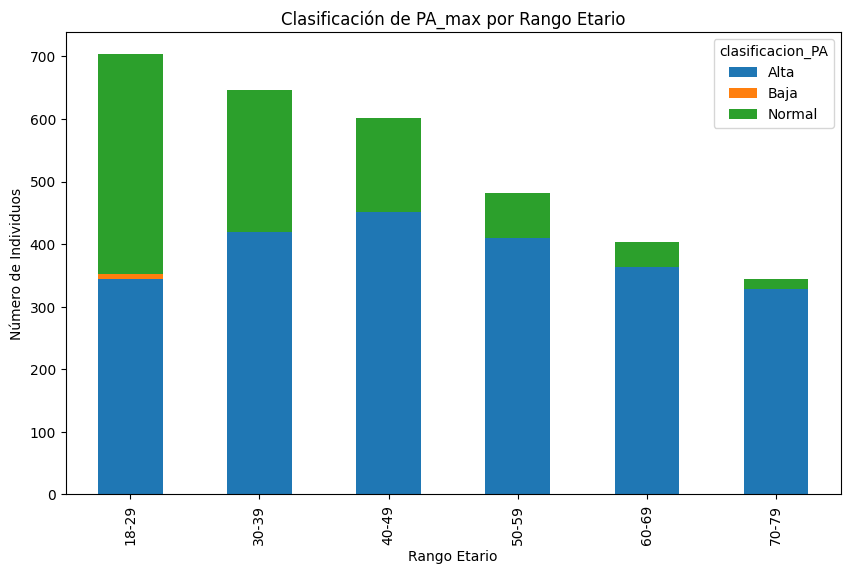

In [ ]:
# Gráfico de barras de la clasificación de PA por rango etario
presion_por_rango.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Clasificación de PA_max por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Número de Individuos')
plt.show()


Este gráfico muestra cómo la presión arterial máxima tiende a aumentar con la edad, pasando de ser mayormente normal en los jóvenes a predominar la hipertensión en los grupos de edad más avanzada. El cambio más notable hacia la hipertensión ocurre entre los 40 y 59 años, lo cual podría estar relacionado con factores de riesgo acumulados a lo largo del tiempo.


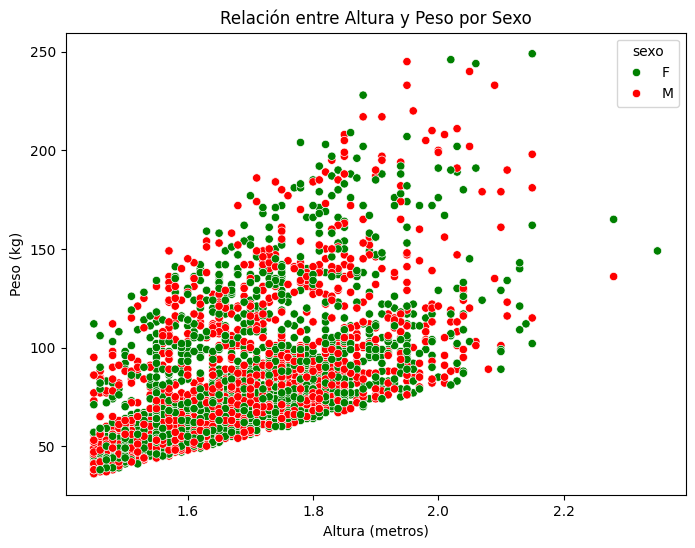

In [ ]:
# Crear un gráfico de dispersión de la relación entre altura y peso por sexo
plt.figure(figsize=(8, 6))
sns.scatterplot(x='altura', y='peso', hue='sexo', data=df, palette=['green', 'red'])
plt.title('Relación entre Altura y Peso por Sexo')
plt.xlabel('Altura (metros)')
plt.ylabel('Peso (kg)')
plt.show()


Relación entre Altura y Peso por Sexo
Aunque no se menciona explícitamente la PA_max en este gráfico, la relación entre altura y peso podría correlacionarse con variables como IMC, que a su vez influyen en la presión arterial. Se observa una distribución consistente con la altura y peso: los hombres (M) tienden a tener mayor peso y altura comparado con las mujeres (F).


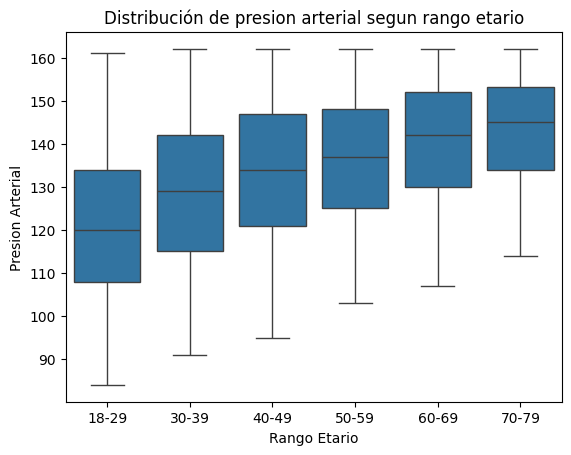

In [ ]:
sns.boxplot(x='rango_etario', y='pa_max', data=df.sort_values('rango_etario', ascending = True))
plt.title('Distribución de presion arterial segun rango etario')
plt.xlabel('Rango Etario')
plt.ylabel('Presion Arterial')
plt.show()


Distribución de PA_max según Rango Etario
La distribución de la PA_max tiende a aumentar a medida que se avanza en los rangos etarios, mostrando una tendencia similar al primer gráfico. Se observa que el rango de la presión arterial máxima es más amplio en los grupos de edad más avanzados (50-59 y 60-69), lo que sugiere una mayor variabilidad en la PA_max con la edad.

In [ ]:
df['IMC'] = df['peso'] / (df['altura'] ** 2)
df

,altura,peso,sexo,edad,pa_max,rango_etario,clasificacion_PA,IMC
0,1.71,69,F,18,98,18-29,Normal,23.597004
1,1.70,122,M,22,144,18-29,Alta,42.214533
2,1.45,42,F,54,133,50-59,Alta,19.976219
3,1.88,101,F,38,158,30-39,Alta,28.576279
4,1.65,52,F,25,103,18-29,Normal,19.100092
...,...,...,...,...,...,...,...,...
3176,1.85,109,F,27,116,18-29,Normal,31.848064
3177,1.85,105,M,74,136,70-79,Alta,30.679328
3178,1.78,66,F,31,99,30-39,Normal,20.830703
3179,1.81,168,F,57,155,50-59,Alta,51.280486


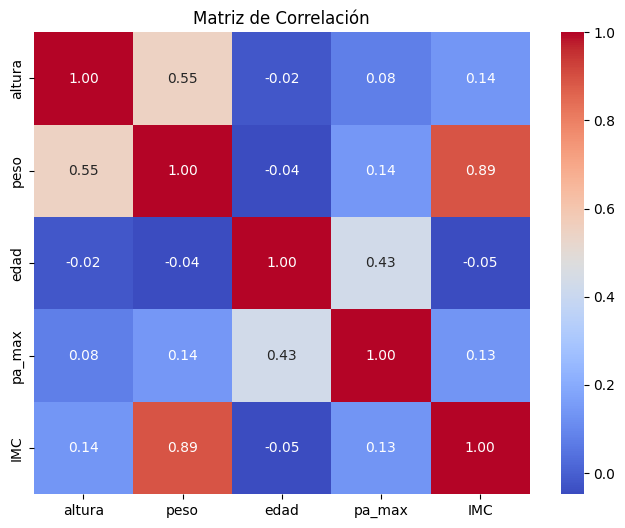

In [ ]:
corr = df[['altura', 'peso', 'edad', 'pa_max', 'IMC']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Interpretación de las Correlaciones:
Altura y Peso (0.55): Tienen una correlación positiva moderada, es decir, en general, a mayor altura, mayor peso.
Peso e IMC (0.89): Muy alta correlación positiva. Tiene sentido ya que el IMC se calcula usando el peso y la altura.
Edad y Presión Arterial Máxima (0.43): Correlación positiva moderada, lo que sugiere que a mayor edad, puede haber un aumento en la presión arterial.
Edad y Peso (-0.04): Correlación muy baja y negativa, lo que indica que prácticamente no hay relación directa entre estas variables en esta muestra.
Presión Arterial e IMC (0.13): Baja correlación positiva, lo que sugiere que a medida que aumenta el IMC, puede aumentar ligeramente la presión arterial.


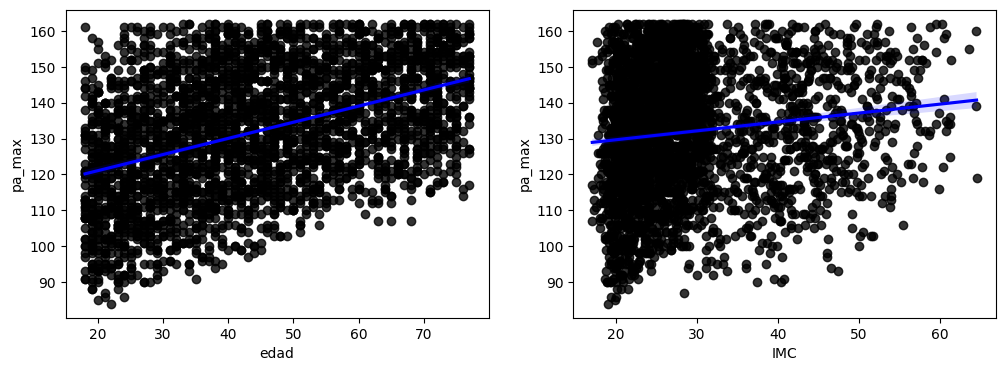

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
sns.regplot(data=df, x='edad', y='pa_max', ax=ax[0], line_kws={'color': 'blue'}, color = 'black')
sns.regplot(data=df, x='IMC', y='pa_max', ax=ax[1],  line_kws={'color': 'blue'}, color = 'black')

plt.show()

Relación entre Edad y PA_max
La gráfica indica que, en general, a medida que aumenta la edad, también se observa un ligero aumento en la presión arterial máxima. La tendencia positiva sugiere que la edad es un factor que contribuye al incremento de la presión arterial, aunque la dispersión de los datos muestra que existen variaciones significativas en cada grupo de edad.

Relación entre IMC y PA_max
La relación entre IMC y PA_max presenta una tendencia ligeramente ascendente, indicando que a mayor IMC, la presión arterial máxima tiende a ser más alta. Sin embargo, la dispersión de los puntos sugiere que esta relación no es muy fuerte, ya que hay individuos con diferentes niveles de PA_max para el mismo IMC.

Conclusion
Los gráficos proporcionan una visión integral sobre cómo la presión arterial máxima (PA_max) varía según factores como la edad, el índice de masa corporal (IMC) y el sexo. Se observa que la PA_max tiene una tendencia a aumentar con la edad y, en menor medida, con el IMC. La distribución de PA_max en diferentes rangos etarios muestra un aumento en la prevalencia de hipertensión en edades más avanzadas. Estos patrones pueden parametrizarse y evaluarse para entender mejor los factores que contribuyen a la presión arterial alta y cómo intervenciones específicas podrían influir en estos resultados.




Estrategias para Parametrizar el Análisis


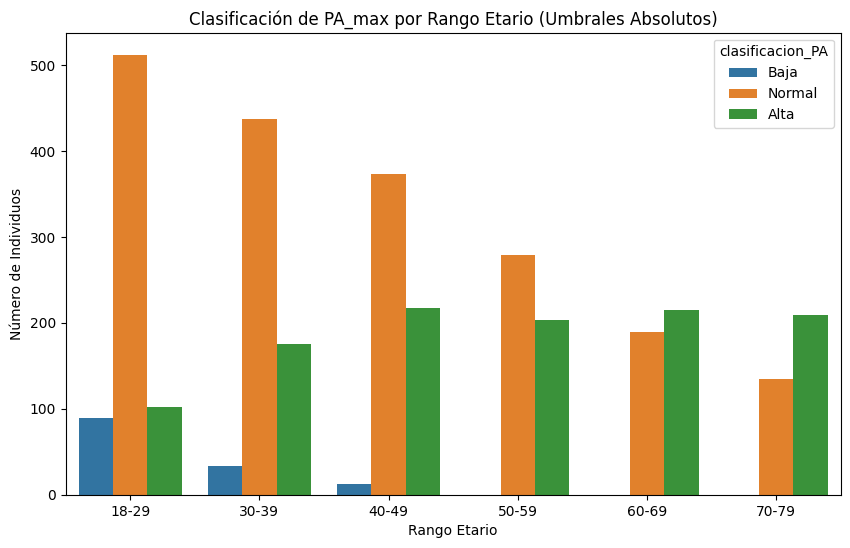

In [ ]:
# Parametrización 1: Clasificación de PA_max basada en umbrales absolutos
# Definición de umbrales de PA_max
umbral_pa_baja = 100
umbral_pa_alta = 140

# Crear la columna 'clasificacion_PA' usando los umbrales definidos
df['clasificacion_PA'] = pd.cut(
    df['pa_max'],
    bins=[-np.inf, umbral_pa_baja, umbral_pa_alta, np.inf],
    labels=['Baja', 'Normal', 'Alta']
)

# Graficar la clasificación de PA_max por rango etario
plt.figure(figsize=(10, 6))
sns.countplot(x='rango_etario', hue='clasificacion_PA', data=df)
plt.title('Clasificación de PA_max por Rango Etario (Umbrales Absolutos)')
plt.xlabel('Rango Etario')
plt.ylabel('Número de Individuos')
plt.legend(title='clasificacion_PA')
plt.show()

Clasificación de PA_max basada en Umbrales Absolutos:

Los umbrales de PA_max están definidos como 100 y 140 para clasificar la presión arterial como Baja, Normal o Alta.
Este enfoque permite evaluar cómo cambian las proporciones en cada rango etario según diferentes criterios de clasificación.

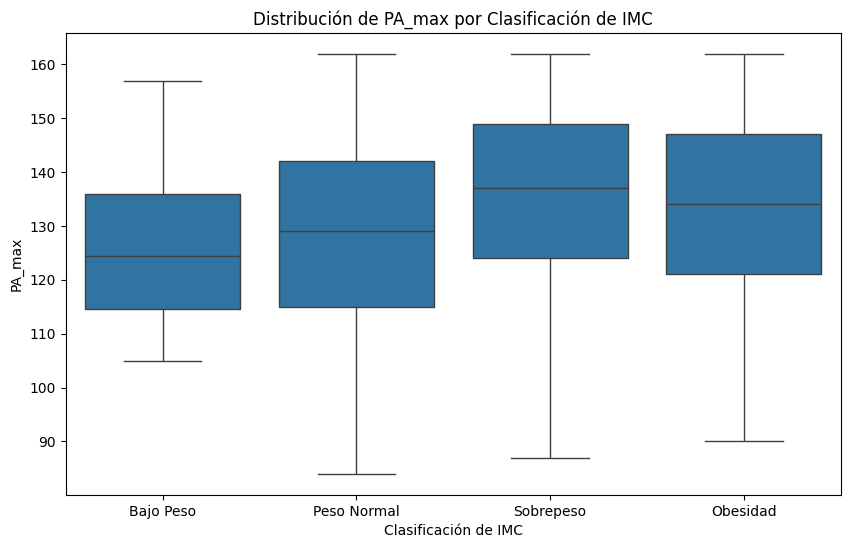

In [ ]:
# Parametrización 2: Clasificación de IMC
# Definir umbrales de IMC para categorizar a los individuos
umbral_imc_bajo = 18.5
umbral_imc_normal = 24.9
umbral_imc_sobrepeso = 29.9

# Crear la columna 'clasificacion_IMC' usando los umbrales definidos
df['clasificacion_IMC'] = pd.cut(
    df['IMC'],
    bins=[-np.inf, umbral_imc_bajo, umbral_imc_normal, umbral_imc_sobrepeso, np.inf],
    labels=['Bajo Peso', 'Peso Normal', 'Sobrepeso', 'Obesidad']
)

# Graficar la clasificación de IMC y su relación con PA_max
plt.figure(figsize=(10, 6))
sns.boxplot(x='clasificacion_IMC', y='pa_max', data=df)
plt.title('Distribución de PA_max por Clasificación de IMC')
plt.xlabel('Clasificación de IMC')
plt.ylabel('PA_max')
plt.show()

Clasificación de IMC:

Se utiliza una categorización basada en los umbrales de IMC comunes: Bajo Peso, Peso Normal, Sobrepeso y Obesidad.
Se grafica cómo la distribución de PA_max varía según estas categorías de IMC.

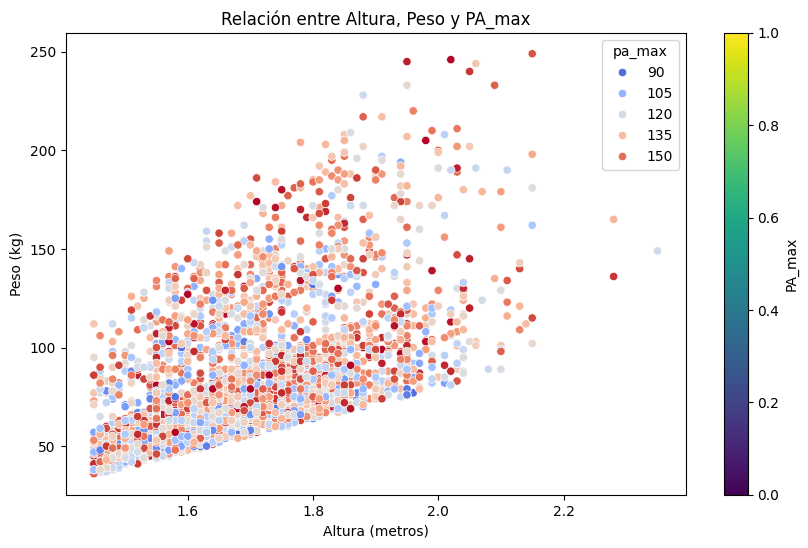

In [ ]:
# Parametrización 3: Relación Altura-Peso por Percentiles
# Definir percentiles para categorizar altura y peso
altura_percentiles = np.percentile(df['altura'], [33, 66])
peso_percentiles = np.percentile(df['peso'], [33, 66])

# Crear la columna 'categoria_altura' usando los percentiles definidos
df['categoria_altura'] = pd.cut(
    df['altura'],
    bins=[-np.inf, altura_percentiles[0], altura_percentiles[1], np.inf],
    labels=['Baja', 'Media', 'Alta']
)

# Crear la columna 'categoria_peso' usando los percentiles definidos
df['categoria_peso'] = pd.cut(
    df['peso'],
    bins=[-np.inf, peso_percentiles[0], peso_percentiles[1], np.inf],
    labels=['Bajo', 'Medio', 'Alto']
)

# Graficar la relación entre Altura, Peso y PA_max
plt.figure(figsize=(10, 6))
# Assign the scatterplot to a variable
scatter = sns.scatterplot(x='altura', y='peso', hue='pa_max', data=df, palette='coolwarm')
plt.title('Relación entre Altura, Peso y PA_max')
plt.xlabel('Altura (metros)')
plt.ylabel('Peso (kg)')
# Use the scatterplot variable to create the colorbar
plt.colorbar(scatter.collections[0], label='PA_max')
plt.show()

Relación Altura-Peso usando Percentiles:

Se crean categorías para altura y peso basadas en percentiles (33 y 66).
El gráfico resultante muestra cómo la PA_max varía en función de la altura y el peso, usando un gráfico de dispersión.